In [1]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm
import networkx as nx
import math 
mpl.rcParams['xtick.labelsize'] = 20
mpl.rcParams['ytick.labelsize'] = 20
mpl.rcParams['font.size'] = 20
mpl.rcParams['figure.autolayout'] = False
mpl.rcParams['axes.linewidth'] = 3
mpl.rcParams['axes.titlesize'] = 20
mpl.rcParams['axes.labelsize'] = 20
mpl.rcParams['lines.linewidth'] = 2.2
mpl.rcParams['lines.markersize'] = 5
mpl.rcParams['lines.markeredgewidth'] = 1.2
mpl.rcParams['errorbar.capsize'] = 5
mpl.rcParams['xtick.major.width'] = 3
mpl.rcParams['xtick.major.size'] = 10
mpl.rcParams['ytick.major.width'] = 3
mpl.rcParams['ytick.major.size'] = 8
mpl.rcParams['xtick.minor.width'] = 1.5
mpl.rcParams['xtick.minor.size'] = 6
mpl.rcParams['ytick.minor.width'] = 1.5
mpl.rcParams['ytick.minor.size'] = 6
mpl.rcParams['legend.fontsize'] = 14
mpl.rcParams['mathtext.fontset'] = 'dejavusans'
mpl.rcParams['font.family'] = 'sans-serif'
cm_colors = plt.get_cmap('Set2')


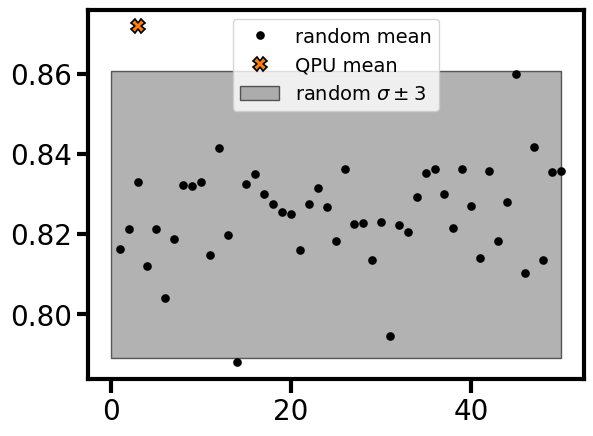

In [5]:
backend = "H2-1"
nq = 56
p = 3
sec = 0
results = np.load(f"./Data/{backend}/{nq}_FC.npy", allow_pickle=True).item()
delta=list(results["postprocessing"].keys())[0]
n_cases = 50
shots = len(results["postprocessing"][delta][p][sec]["results"][:,1])
rand_data = results["random"]["results"][:,1]
rand_mean = []
fig, ax = plt.subplots()
np.random.seed(1)
rand_data = results["random"]["results"][:,1]
for i in range(n_cases):
    np.random.shuffle(rand_data)
    ax.plot([i+1], np.mean(rand_data[:shots]), marker="o", linewidth=0, color="black")
    rand_mean.append(np.mean(rand_data[:shots]))
ax.plot([], [], marker="o", linewidth=0, color="black", label="random mean")

rand_mean = np.array(rand_mean)
y1 = rand_mean.mean()
y2 = 3*rand_mean.std()
ax.plot(list(results["postprocessing"][delta].keys()), [results["postprocessing"][delta][p][sec]["r"] for p in results["ps"]], marker="X", linewidth=0, markersize=10, markeredgecolor="black", label="QPU mean", color="tab:orange")

ax.fill_between([0, n_cases], [y1-y2,y1-y2], [y1+y2,y1+y2], color="grey", alpha=0.6, edgecolor="black", label=r"random $\sigma \pm 3$")
ax.legend()
# fig.savefig(f"./Figures/sampling/{nq}_{backend}_{p}.pdf", bbox_inches="tight", transparent=True)


0.8620040590956934 7
0.8362569762249301 100


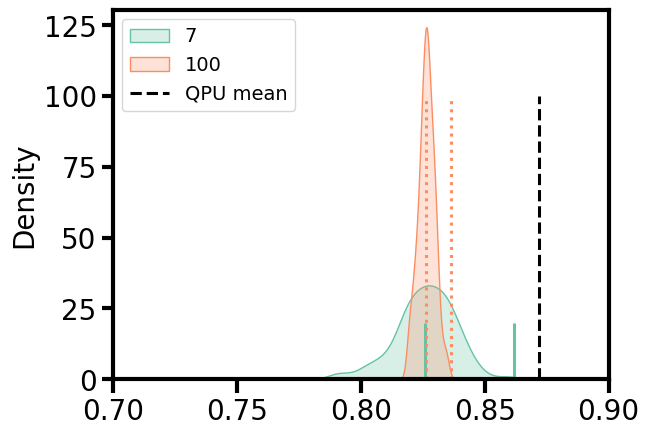

In [77]:
import seaborn as sns
backend = "H2-1"
colors = plt.get_cmap("Set2")
nq = 56
p = 3
sec = 0
results = np.load(f"./Data/{backend}/{nq}_FC.npy", allow_pickle=True).item()
delta=list(results["postprocessing"].keys())[0]
n_cases = 200
shots = len(results["postprocessing"][delta][p][sec]["results"][:,1])
rand_data = results["random"]["results"][:,1]

fig, ax = plt.subplots()
np.random.seed(1)
rand_data = results["random"]["results"][:,1]
list_shots = [7, 100]
for j, shots in enumerate(list_shots):
    rand_mean = []
    for i in range(n_cases):
        np.random.shuffle(rand_data)
        # ax.plot([i+1], np.mean(rand_data[:shots]), marker="o", linewidth=0, color="black")
        rand_mean.append(np.mean(rand_data[:shots]))
    # ax.plot([], [], marker="o", linewidth=0, color="black", label="random mean")

    rand_mean = np.array(rand_mean)
    y1 = rand_mean.mean()
    y2 = 3*rand_mean.std()
    print(y1 + y2, shots)
    problems = ["MaxCut", "PO", "MIS", "TSP", "BPP","KP", "2SAT2"]
    sns.kdeplot(rand_mean, ax=ax, label=shots, color=colors(j), fill=True, linewidth=1)
    if shots == 7:
        y2_7 = y2
        ax.vlines(y1, 0, 20, color=colors(j))
        ax.vlines(y1+y2, 0, 20, color=colors(j))
    if shots == 100:
        y2_100 = y2
        ax.vlines(y1, 0, 100, color=colors(j), linestyles=":")
        ax.vlines(y1+y2, 0, 100, color=colors(j), linestyles=":")


    
    # ax.fill_between([0, n_cases], [y1-y2,y1-y2], [y1+y2,y1+y2], alpha=0.6, edgecolor="black", label=f"{shots}", color=colors(j))
    # ax.legend()

ax.vlines([results["postprocessing"][delta][p][sec]["r"] for p in results["ps"]], 0, 100, linestyles="--", label="QPU mean", color="black")
ax.legend(loc=2)
# ax.set_yscale("log")
ax.set_xlim(0.7, 0.9)
fig.savefig("./Figures/sampling/hist_std.pdf", bbox_inches="tight", transparent=True)
